In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from importlib import reload

import sys
sys.path.insert(1,'C:/Users/Sole/Documents/Udemy/feature_engine/feature_engine')

import discretisers as disc

In [2]:
def load_houseprice():
    data = pd.read_csv('houseprice.csv')
    return data

In [3]:
data = load_houseprice()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
var_no_nulls = [x for x in data.columns if data[x].isnull().sum()==0]

data[var_no_nulls].dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
ExterQual        object
ExterCond        object
Foundation       object
BsmtFinSF1        int64
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
                  ...  
CentralAir       object
1stFlrSF          int64
2ndFlrSF          int64
LowQualFinSF      int64
GrLivArea         int64
BsmtFullBath      int64
BsmtHalfBath      int64
FullBath          int64
HalfBath          int64
BedroomAbvGr      int64
KitchenAbvGr    

## EqualFrequencyDiscretiser

In [5]:
reload(disc)

<module 'discretisers' from 'C:/Users/Sole/Documents/Udemy/feature_engine/feature_engine\\discretisers.py'>

In [6]:
efd = disc.EqualFrequencyDiscretiser(q=10, variables = ['LotArea', 'GrLivArea'])
efd.fit(data)

EqualFrequencyDiscretiser(q=10, variables=['LotArea', 'GrLivArea'])

In [8]:
data_tf = efd.transform(data)

In [9]:
data_tf['GrLivArea'].unique()

array([7, 3, 9, 4, 6, 8, 2, 1, 0, 5], dtype=int64)

In [10]:
tmp = pd.concat([data['GrLivArea'], data_tf['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
0,1710,7
1,1262,3
2,1786,7
3,1717,7
4,2198,9


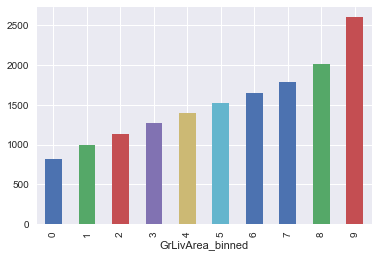

In [11]:
tmp.groupby('GrLivArea_binned')['GrLivArea'].mean().plot.bar()

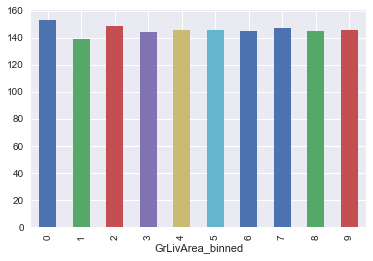

In [12]:
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()

In [13]:
tmp, bins = pd.qcut(x=data['GrLivArea'], q=10, retbins=True, duplicates='drop')

In [14]:
bins

array([  334. ,   912. ,  1066.6,  1208. ,  1339. ,  1464. ,  1578. ,
        1709.3,  1869. ,  2158.3,  5642. ])

In [15]:
efd.binner_dict['GrLivArea']

[-inf,
 912.0,
 1066.5999999999999,
 1208.0,
 1339.0,
 1464.0,
 1578.0,
 1709.3000000000002,
 1869.0,
 2158.3000000000002,
 inf]

## EqualWidthDiscretiser

In [16]:
data = load_houseprice()

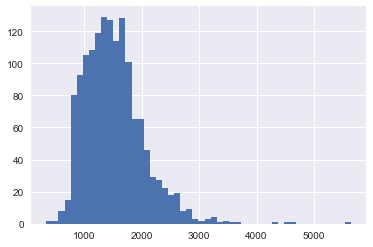

In [17]:
data['GrLivArea'].hist(bins=50)

In [18]:
ewd = disc.EqualWidthDiscretiser(bins=10, variables = ['LotArea', 'GrLivArea'])
ewd.fit(data)

EqualWidthDiscretiser(bins=10, variables=['LotArea', 'GrLivArea'])

In [19]:
tmp, bins = pd.cut(x=data['GrLivArea'], bins=10, retbins=True, duplicates='drop')
bins

array([  328.692,   864.8  ,  1395.6  ,  1926.4  ,  2457.2  ,  2988.   ,
        3518.8  ,  4049.6  ,  4580.4  ,  5111.2  ,  5642.   ])

In [20]:
data_tf = ewd.transform(data)

In [21]:
data_tf['GrLivArea'].unique()

array([2, 1, 3, 0, 4, 5, 6, 8, 7, 9], dtype=int64)

In [22]:
tmp = pd.concat([data['GrLivArea'], data_tf['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
0,1710,2
1,1262,1
2,1786,2
3,1717,2
4,2198,3


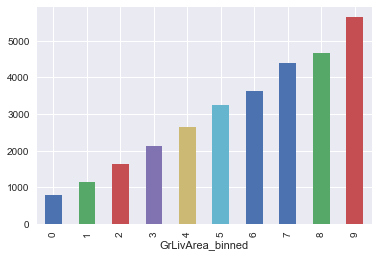

In [23]:
tmp.groupby('GrLivArea_binned')['GrLivArea'].mean().plot.bar()

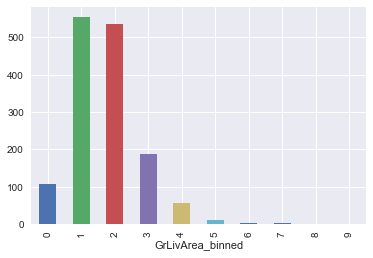

In [24]:
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()

## DecisionTreeDiscretiser

In [36]:
data = load_houseprice()

In [37]:
reload(disc)

<module 'discretisers' from 'C:/Users/Sole/Documents/Udemy/feature_engine/feature_engine\\discretisers.py'>

In [38]:
treeDisc = disc.DecisionTreeDiscretiser(cv = 3, scoring='neg_mean_squared_error',
                                        variables = ['LotArea', 'GrLivArea'])
treeDisc.fit(data, data.SalePrice)

DecisionTreeDiscretiser(cv=3, scoring='neg_mean_squared_error',
            variables=['LotArea', 'GrLivArea'])

In [39]:
data_tf = treeDisc.transform(data)

In [40]:
data_tf['GrLivArea'].unique()

array([ 197442.16893733,  152815.83673469,  239358.13362069,
        124965.92857143,  313656.01136364,   89009.80851064,
        172635.48453608,  490791.66666667])

In [43]:
tmp = pd.concat([data['GrLivArea'], data_tf['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
0,1710,197442.168937
1,1262,152815.836735
2,1786,197442.168937
3,1717,197442.168937
4,2198,239358.133621


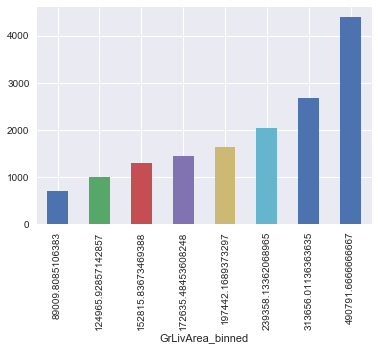

In [44]:
tmp.groupby('GrLivArea_binned')['GrLivArea'].mean().plot.bar()

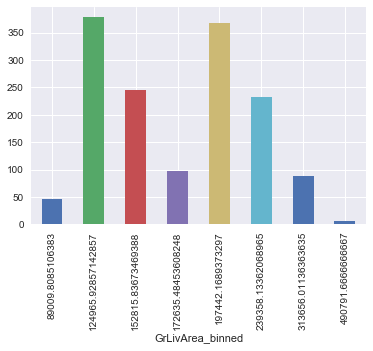

In [45]:
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()